## MOUSHILI BISWAS
# PROJECT-1
## DATA SCIENCE INTERN
# Churn Prediction in Telecom Industry using Logistic Regression

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import plotly.express as px

In [2]:
telecom_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
telecom_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telecom_data.shape

(7043, 21)

In [5]:
telecom_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# Checking Null values
telecom_data.notnull().sum()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

In [7]:
#There is no missing value in our dataset
%matplotlib inline

In [8]:
telco_hist = px.histogram(telecom_data, x='gender',color='Churn')
telco_hist.update_layout(bargap=0.2)

<BarContainer object of 7043 artists>

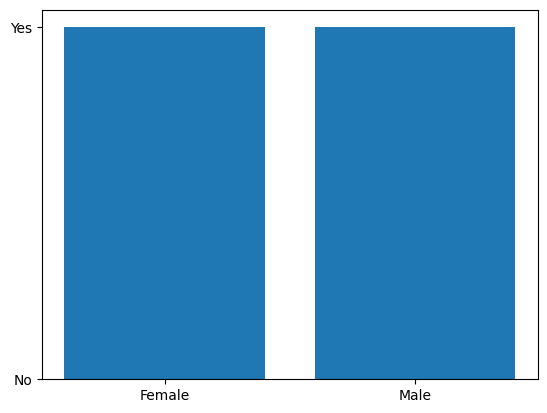

In [9]:
plt.bar(telecom_data['gender'],telecom_data['Churn'])

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>, <Axes: >]],
      dtype=object)

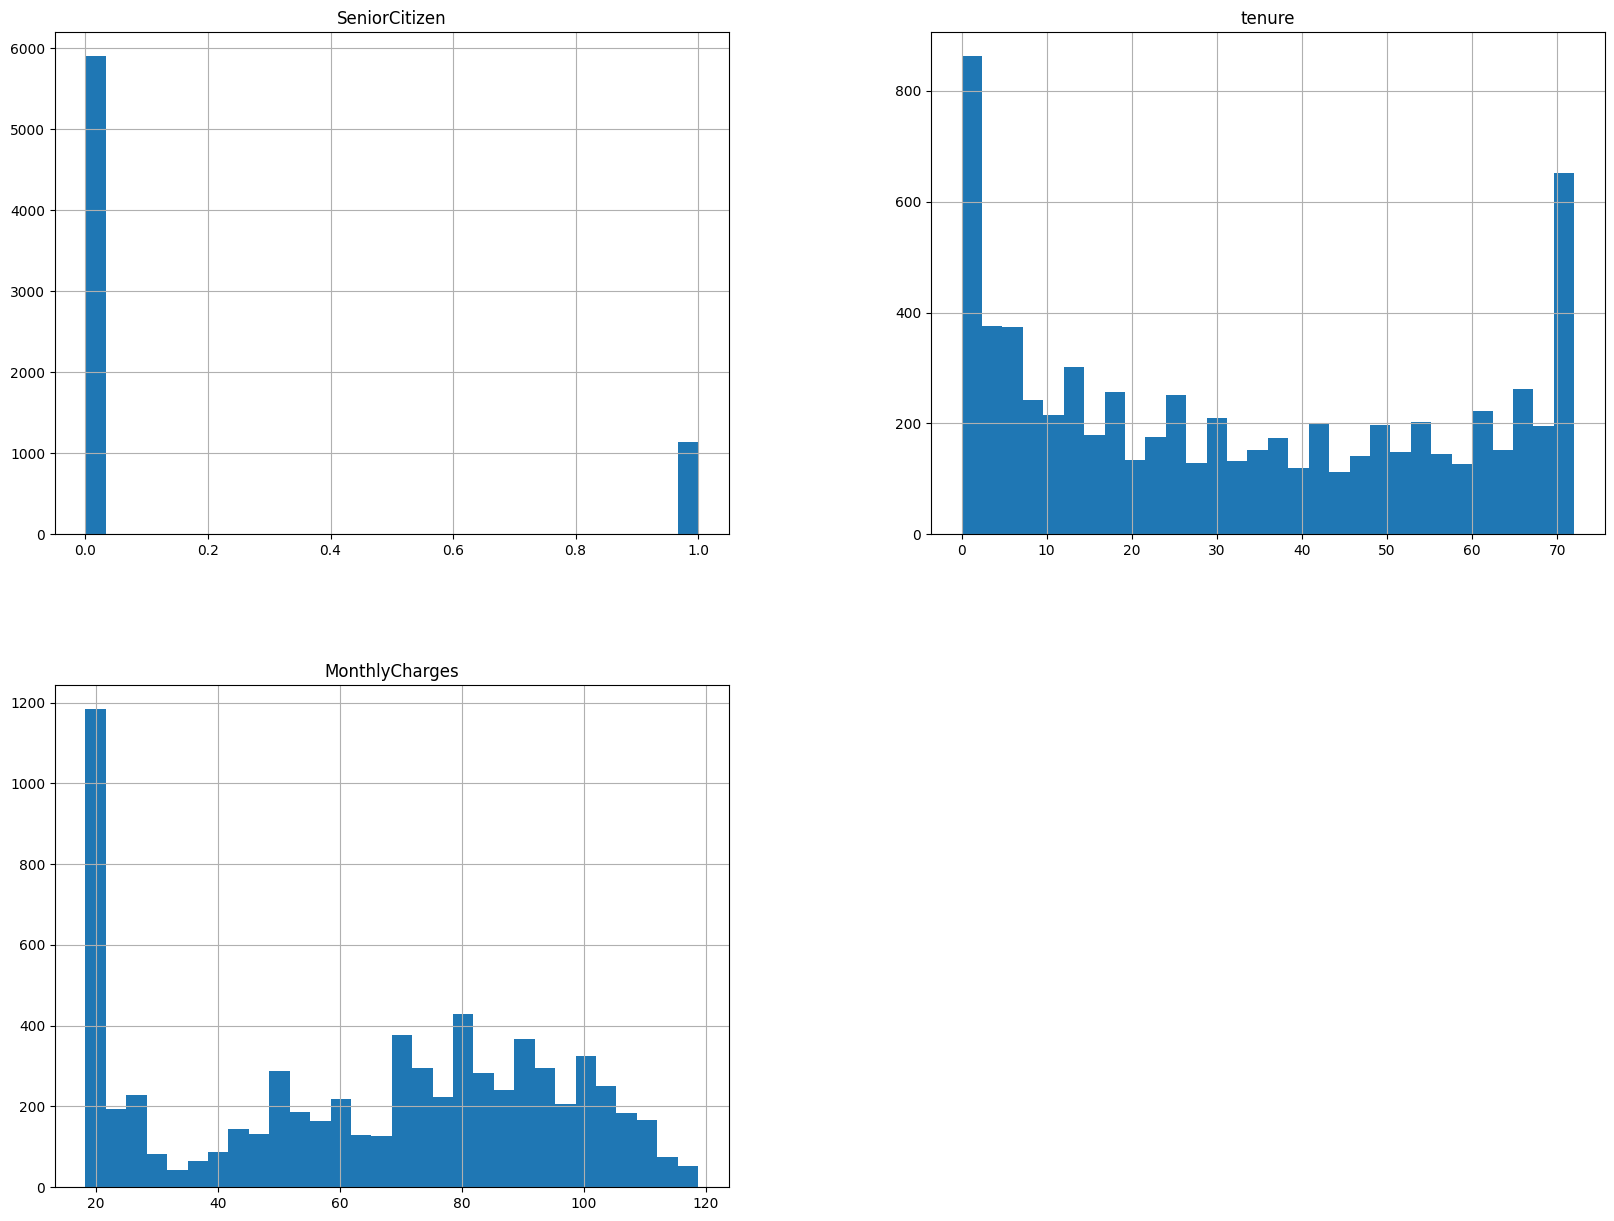

In [10]:
telecom_data.hist(bins=30,figsize=(20,15))

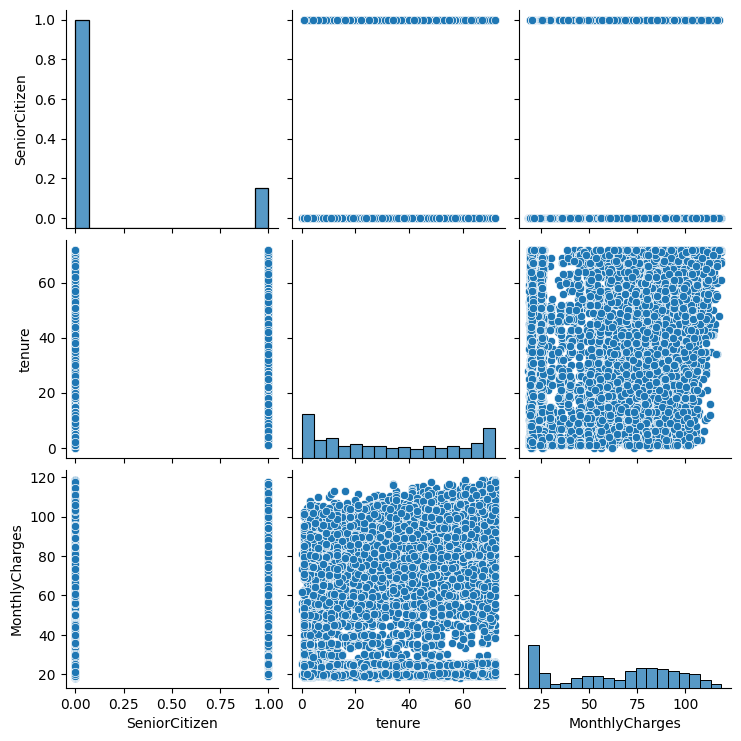

In [11]:
sns.pairplot(telecom_data)

# Cleaning Data

In [12]:
#Removing gender,customerID, tenture because they are not usefull

In [13]:
col=['gender','customerID','tenure']
telecom_data=telecom_data.drop(col,axis=1)

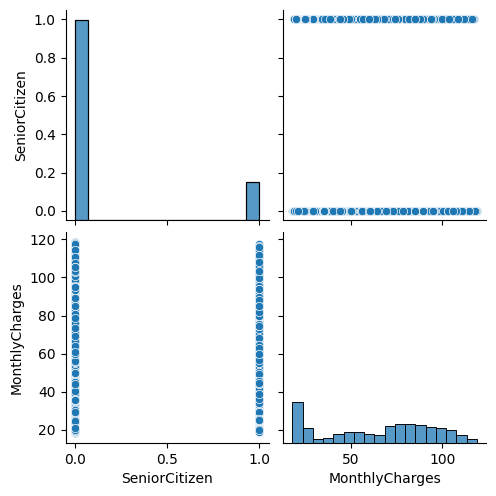

In [14]:
sns.pairplot(telecom_data)

In [15]:
telecom_data.head()

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
telecom_data['TotalCharges'].notnull().sum()

7043

In [17]:
telecom_data['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [18]:
telecom_data['TotalCharges'].describe()
#The datatype of the TotalCharges is Object so we will change that

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [19]:
#Due to string(" ") at 488 position you can not chnage the TotalCharges into Int
#so we will be removing and replacing that string with " "
telecom_data['TotalCharges']=telecom_data['TotalCharges'].replace(" ",np.nan)
telecom_data['TotalCharges']=pd.to_numeric(telecom_data['TotalCharges'],errors='coerce')
#coerce will replace all the non-numeric
#dropping all the rows in which there is a null value
telecom_data=telecom_data.dropna(how="any",axis=0)
#removing all the rows which have null values in it

In [20]:
telecom_data['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [21]:
telecom_data.notnull().sum()

SeniorCitizen       7032
Partner             7032
Dependents          7032
PhoneService        7032
MultipleLines       7032
InternetService     7032
OnlineSecurity      7032
OnlineBackup        7032
DeviceProtection    7032
TechSupport         7032
StreamingTV         7032
StreamingMovies     7032
Contract            7032
PaperlessBilling    7032
PaymentMethod       7032
MonthlyCharges      7032
TotalCharges        7032
Churn               7032
dtype: int64

In [22]:
#Check if TotalCharges has some null values in it

In [23]:
telecom_data.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Exploratory Data Analysis(EDA)

In [24]:
telecom_data['Churn'].describe()

count     7032
unique       2
top         No
freq      5163
Name: Churn, dtype: object

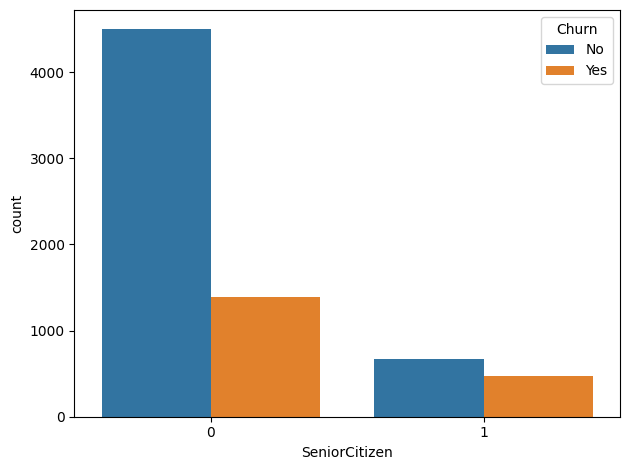

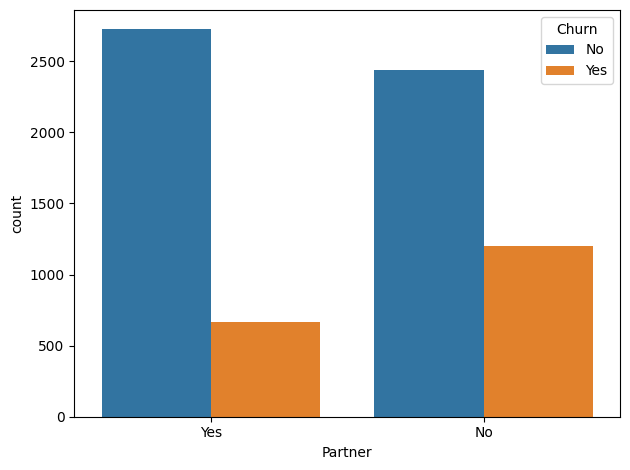

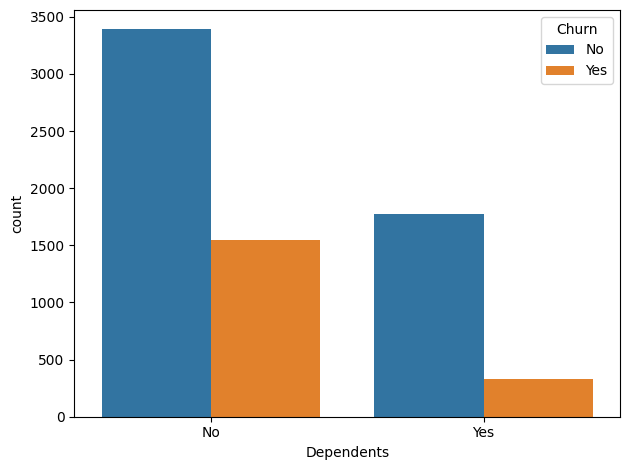

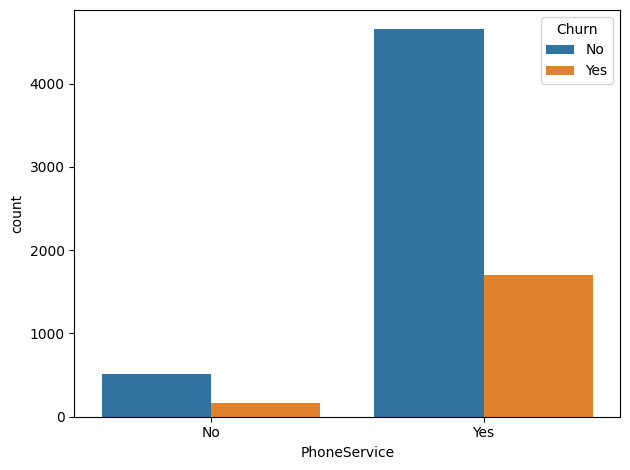

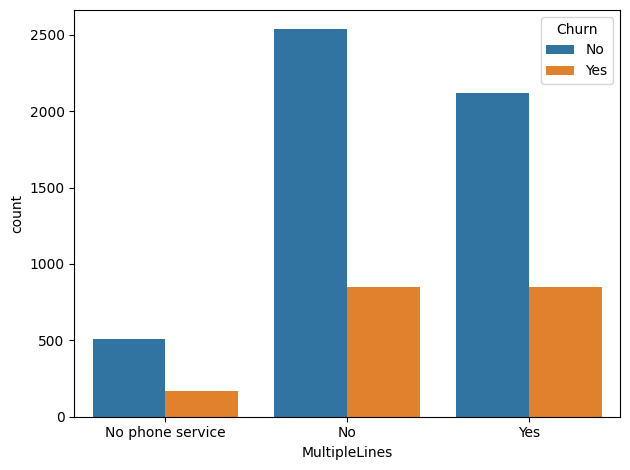

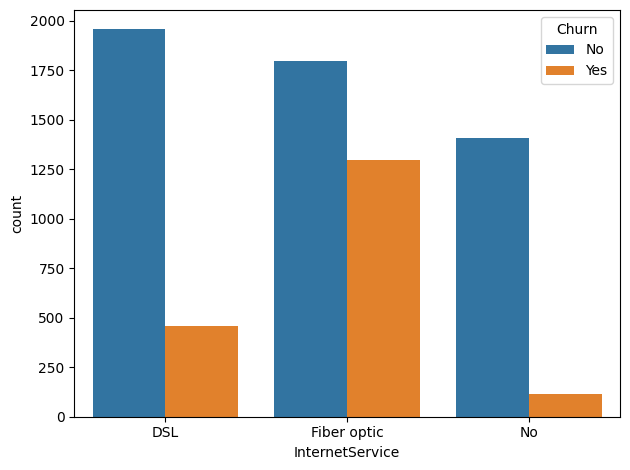

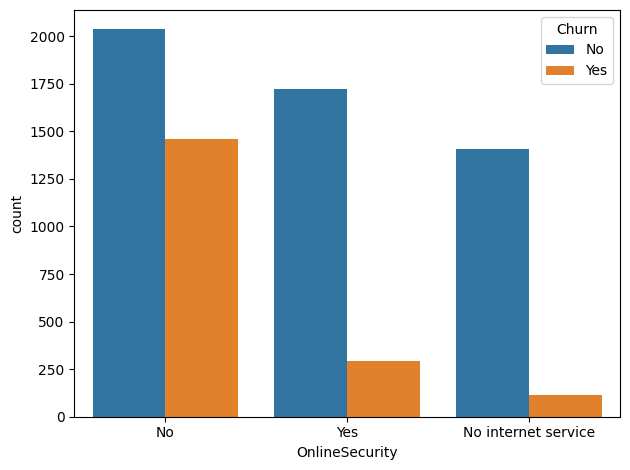

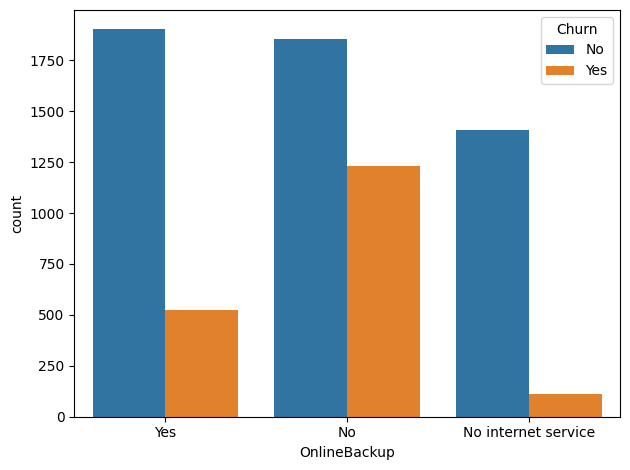

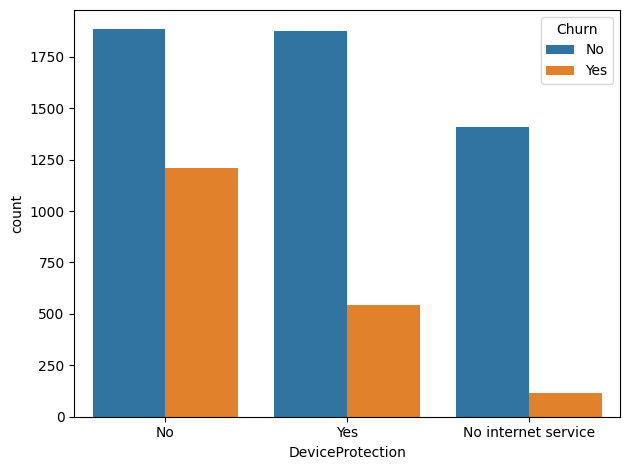

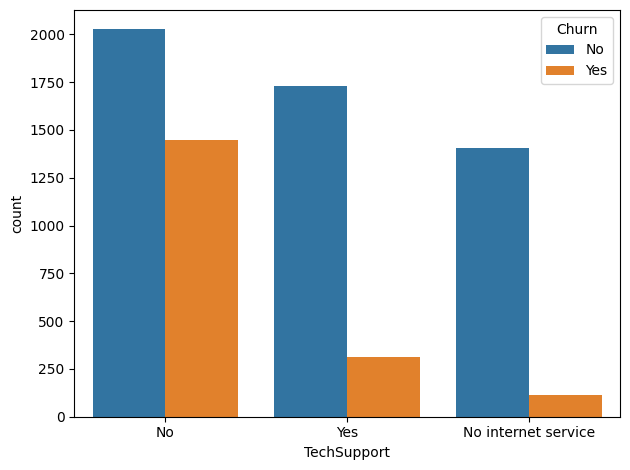

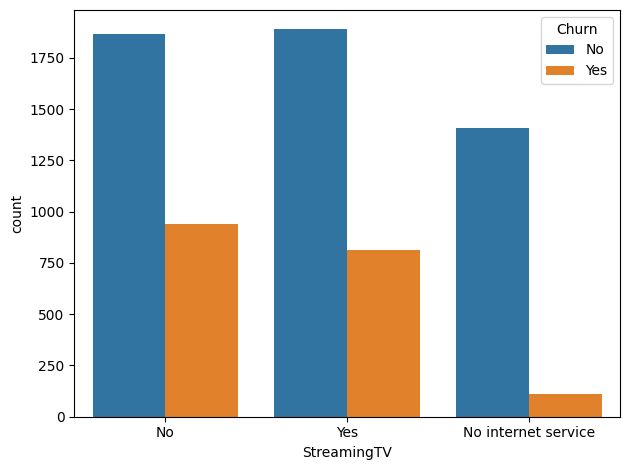

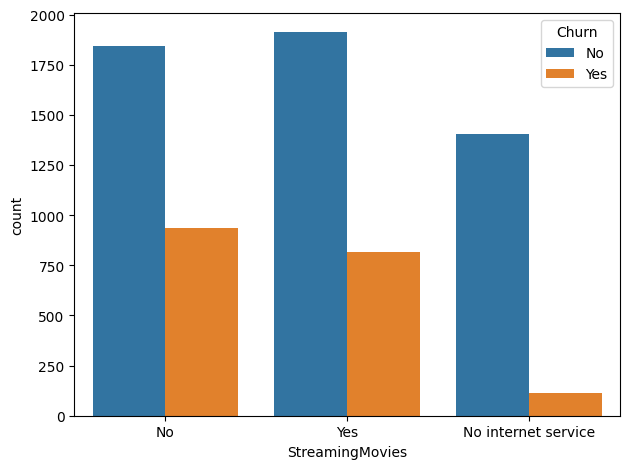

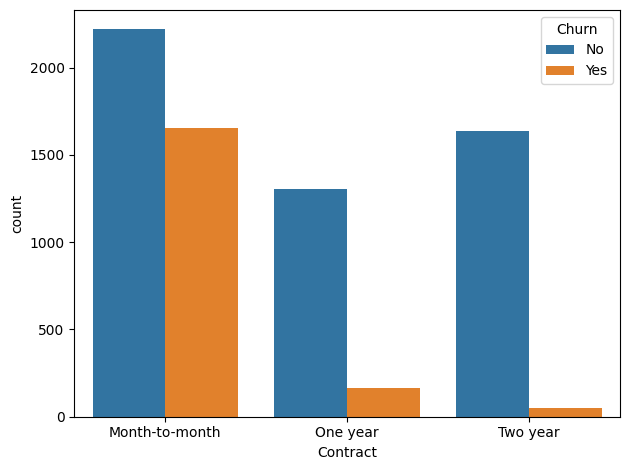

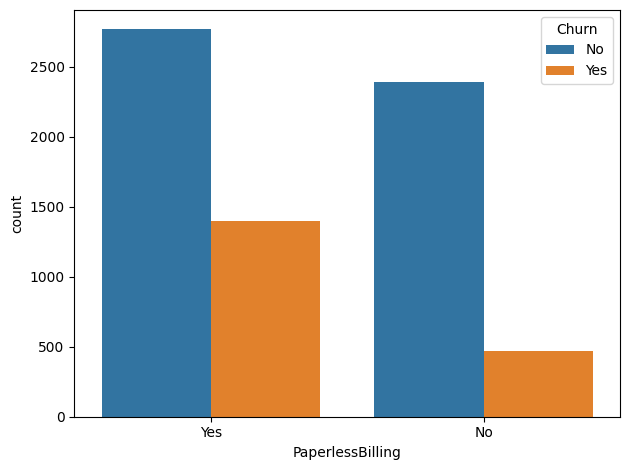

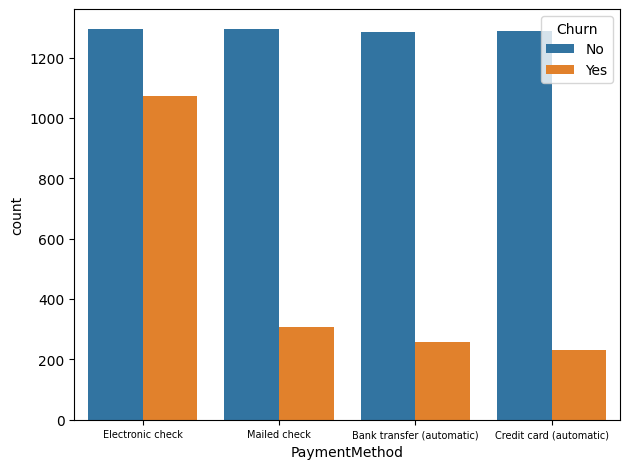

In [26]:
for i, predictor in enumerate(telecom_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    ax = sns.countplot(data =telecom_data, x = predictor, hue='Churn')
    if predictor == "PaymentMethod":
        ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
        plt.tight_layout()
        plt.show()
    else:
        plt.tight_layout()
        plt.show()

In [27]:
#Converting Yes as 1 and No as 0
telecom_data["Churn"]=telecom_data["Churn"].replace(['Yes','No'],[1,0])

<ipython-input-27-72948bb94277>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
telecom_data

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [29]:
telecom_data_dummies=pd.get_dummies(telecom_data)

In [30]:
telecom_data_dummies

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,29.85,29.85,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,56.95,1889.50,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,53.85,108.15,1,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,42.30,1840.75,0,1,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,70.70,151.65,1,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,0,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,0,103.20,7362.90,0,0,1,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,0,29.60,346.45,0,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,74.40,306.60,1,0,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1


In [31]:
churn_corr_matrix = telecom_data_dummies.corr()

<Axes: >

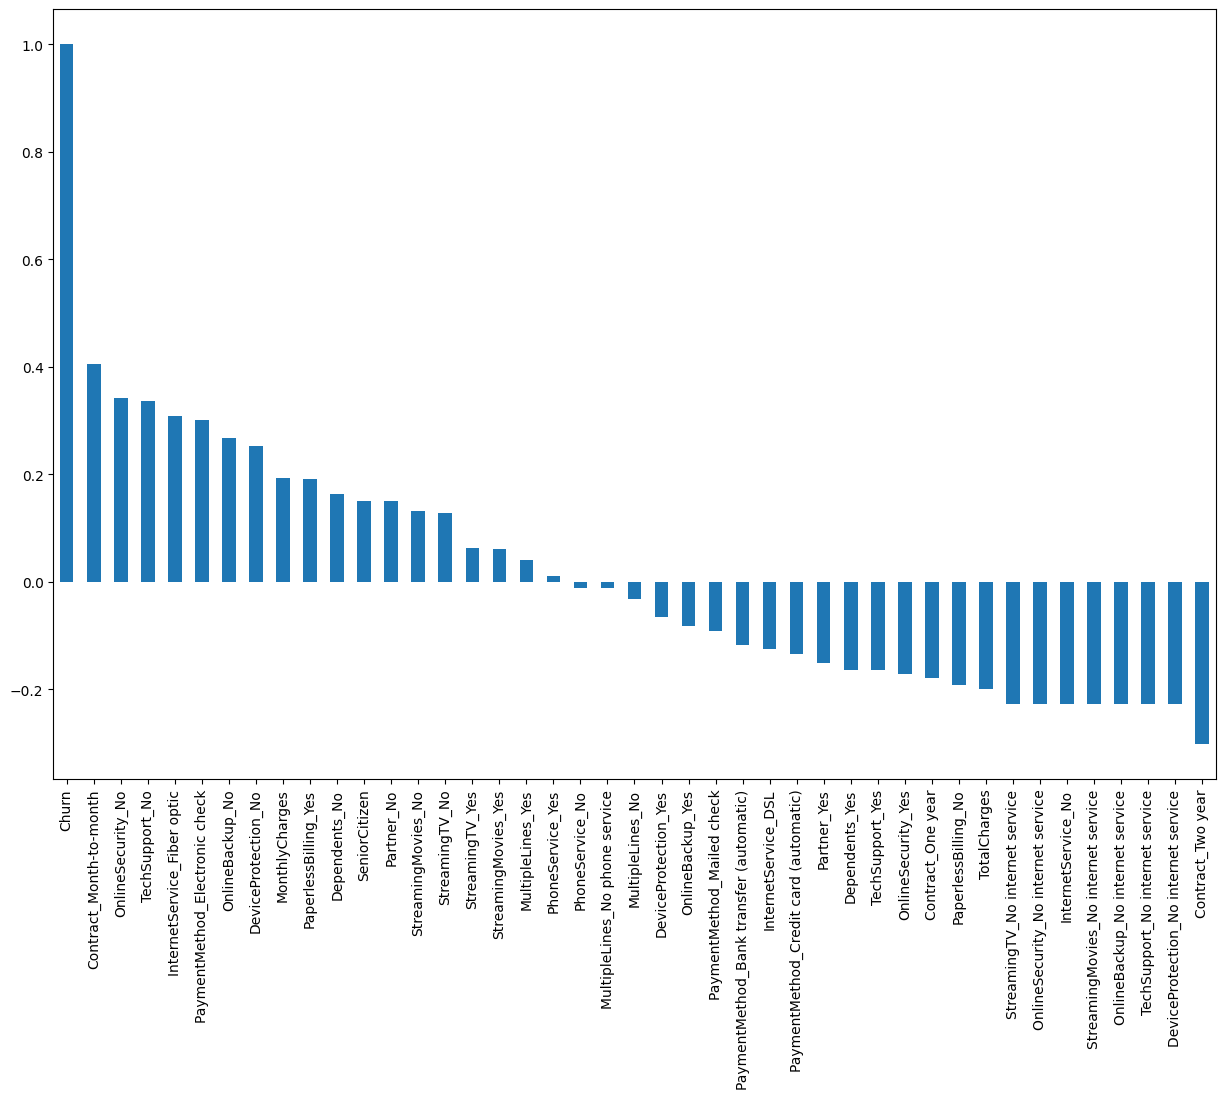

In [32]:
churn_corr_matrix['Churn'].sort_values(ascending=False).plot(kind='bar',figsize = (15,10))

In [33]:
churn_corr_matrix['Churn'].sort_values(ascending=False)

Churn                                      1.000000
Contract_Month-to-month                    0.404565
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
MonthlyCharges                             0.192858
PaperlessBilling_Yes                       0.191454
Dependents_No                              0.163128
SeniorCitizen                              0.150541
Partner_No                                 0.149982
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
PhoneService_Yes                           0.011691
PhoneService

In [34]:
#Data part into x and y

In [35]:
x=telecom_data_dummies.drop('Churn',axis=1)

In [36]:
x

,SeniorCitizen,MonthlyCharges,TotalCharges,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,29.85,29.85,0,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0,56.95,1889.50,1,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,1
2,0,53.85,108.15,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,0,1
3,0,42.30,1840.75,1,0,1,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0
4,0,70.70,151.65,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,0,1,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,103.20,7362.90,0,1,0,1,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,29.60,346.45,0,1,0,1,1,0,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,74.40,306.60,0,1,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1


In [37]:
y=telecom_data_dummies['Churn']

In [38]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [39]:
x.shape

(7032, 42)

In [40]:
y.shape

(7032,)

In [41]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

# Variable Imbalancing

In [42]:
from imblearn.over_sampling import SMOTE

In [45]:
smote = SMOTE(random_state=0)

In [46]:
x_resampled_smote, y_resampled_smote = smote.fit_resample(x,y)

In [47]:
y_resampled_smote.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [48]:
x_resampled_smote

,SeniorCitizen,MonthlyCharges,TotalCharges,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,29.850000,29.850000,0,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0,56.950000,1889.500000,1,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,1
2,0,53.850000,108.150000,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,0,1
3,0,42.300000,1840.750000,1,0,1,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0
4,0,70.700000,151.650000,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10321,0,103.976753,242.804921,0,1,1,0,0,1,0,...,1,1,0,0,0,1,0,0,0,0
10322,0,35.824447,35.824447,1,0,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
10323,0,44.493077,1061.960339,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
10324,0,19.363055,19.363055,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,0,1


In [49]:
y_resampled_smote.notnull().sum()

10326

In [50]:
x_resampled_smote.notnull().sum()

SeniorCitizen                              10326
MonthlyCharges                             10326
TotalCharges                               10326
Partner_No                                 10326
Partner_Yes                                10326
Dependents_No                              10326
Dependents_Yes                             10326
PhoneService_No                            10326
PhoneService_Yes                           10326
MultipleLines_No                           10326
MultipleLines_No phone service             10326
MultipleLines_Yes                          10326
InternetService_DSL                        10326
InternetService_Fiber optic                10326
InternetService_No                         10326
OnlineSecurity_No                          10326
OnlineSecurity_No internet service         10326
OnlineSecurity_Yes                         10326
OnlineBackup_No                            10326
OnlineBackup_No internet service           10326
OnlineBackup_Yes    

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
#checking on imbalance data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [53]:
LogReg = LogisticRegression(solver='lbfgs', max_iter=400)

In [54]:
LogReg.fit(x_train,y_train)

LogisticRegression(max_iter=400)

In [55]:
y_pred = LogReg.predict(x_test)

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(y_test,y_pred)

0.7853589196872779

In [58]:
#checking on balanced data
x_smote_train,x_smote_test,y_smote_train,y_smote_test = train_test_split(x_resampled_smote,y_resampled_smote)

In [59]:
LogReg.fit(x_smote_train,y_smote_train)

LogisticRegression(max_iter=400)

In [60]:
y_smote_pred = LogReg.predict(x_smote_test)

In [61]:
accuracy_score(y_smote_test,y_smote_pred)

0.8396591789310612